In [1]:
import numpy as np, statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
lift = 1.01
p0 = 0.5
#Given a fixed size of sample
totalsamplesize=20000

In [16]:
#population mean difference = p1-p0=p0*(lift-1)
delta=p0*(lift-1)

In [17]:
#p(1-p)
variance=p0*(1-p0)
std=np.sqrt(variance)
print(delta,std)

0.0050000000000000044 0.5


**Using Simulation**

In [6]:
power=[]
n=100
m=500
for s in range(500):
    k =2500+25*(s+1)-100
    ci=[]
    for i in range(n):
        ctrl = np.random.binomial(1, p0, totalsamplesize-k)
        test = np.random.binomial(1, p0*lift, k)
        cm = sms.CompareMeans(sms.DescrStatsW(test), sms.DescrStatsW(ctrl))
        a,b = cm.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='unequal')
        ci.append((a,b))
    t2=sum((x[0]<=0 and x[1]>=0) for x in ci)/n
    pw=1-t2
    # k1/k0
    r=(15000-k)/k
    power.append((r,pw))
    

Text(0, 0.5, 'Power')

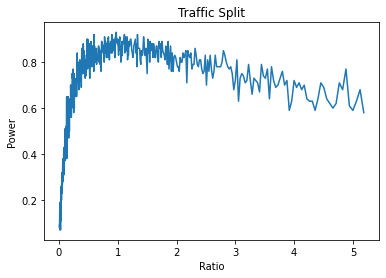

In [7]:
l_y=[x[1] for x in power]
s_x=[x[0] for x in power]

plt.plot(s_x,l_y)
plt.title('Traffic Split')
plt.xlabel('Ratio')
plt.ylabel('Power')

**Using the function**

In [18]:
from statsmodels.stats.power import zt_ind_solve_power

In [19]:
effectsize=delta/std
print(delta,effectsize)

0.0050000000000000044 0.010000000000000009


In [20]:
power=[]
lpw=[]
for s in range(30,70):
    k1 =((s+1)/100)*15000
    k0 = 15000-k1
    r = k1/k0
    pw=zt_ind_solve_power(effect_size=effectsize, nobs1=k0, alpha=0.05, ratio=r, alternative='two-sided')
    power.append((r,pw))
    lpw.append(pw)
    print(r,pw) 

0.4492753623188406 0.08749203476222268
0.47058823529411764 0.08815202921008315
0.4925373134328358 0.08877665993026321
0.5151515151515151 0.08936587305120942
0.5384615384615384 0.08991961833450068
0.5625 0.09043784907560412
0.5873015873015873 0.09092052201105622
0.6129032258064516 0.09136759723198883
0.639344262295082 0.09177903810393061
0.6666666666666666 0.09215481119281485
0.6949152542372882 0.09249488619713445
0.7241379310344828 0.09279923588618337
0.7543859649122807 0.0930678360443371
0.7857142857142857 0.09330066542132252
0.8181818181818182 0.09349770568843596
0.8518518518518519 0.09365894140067338
0.8867924528301887 0.09378435996474113
0.9230769230769231 0.09387395161291817
0.9607843137254902 0.09392770938275073
1.0 0.09394562910255964
1.0408163265306123 0.09392770938275073
1.0833333333333333 0.09387395161291817
1.127659574468085 0.09378435996474113
1.1739130434782612 0.09365894140067338
1.2222222222222223 0.09349770568843596
1.2727272727272727 0.09330066542132252
1.3255813953488

In [21]:
#Find the max power
maxpw=np.max(lpw)
print(maxpw)

0.09394562910255964


In [22]:
# Find ratio of power = maxpw
index_=[power.index(x) for x in power if x[1]==maxpw]
max_r=[power[i][0] for i in index_]
print(max_r)

[1.0]


Text(0, 0.5, 'Power')

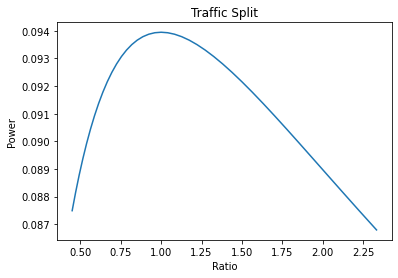

In [23]:
l_y=[x[1] for x in power]
s_x=[x[0] for x in power]

plt.plot(s_x,l_y)
plt.title('Traffic Split')
plt.xlabel('Ratio')
plt.ylabel('Power')